<a href="https://colab.research.google.com/github/LydiaXiaohongLi/Albert_Finetune_with_Pretrain_on_Custom_Corpus/blob/master/Albert_Finetune_with_Pretrain_on_Custom_Corpus_ToyModel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Download data

In [0]:
!wget https://github.com/LydiaXiaohongLi/Albert_Finetune_with_Pretrain_on_Custom_Corpus/raw/master/data_toy/dish_name_train.csv
!wget https://github.com/LydiaXiaohongLi/Albert_Finetune_with_Pretrain_on_Custom_Corpus/raw/master/data_toy/dish_name_val.csv
!wget https://github.com/LydiaXiaohongLi/Albert_Finetune_with_Pretrain_on_Custom_Corpus/raw/master/data_toy/restaurant_review.txt
!wget https://github.com/LydiaXiaohongLi/Albert_Finetune_with_Pretrain_on_Custom_Corpus/raw/master/data_toy/restaurant_review_nopunct.txt
!wget https://github.com/LydiaXiaohongLi/Albert_Finetune_with_Pretrain_on_Custom_Corpus/raw/master/models_toy/albert_config.json
!wget https://github.com/LydiaXiaohongLi/Albert_Finetune_with_Pretrain_on_Custom_Corpus/raw/master/model_checkpoint/finetune_checkpoint
!wget https://github.com/LydiaXiaohongLi/Albert_Finetune_with_Pretrain_on_Custom_Corpus/raw/master/model_checkpoint/pretrain_checkpoint

--2020-03-07 09:32:50--  https://github.com/LydiaXiaohongLi/Albert_Finetune_with_Pretrain_on_Custom_Corpus/raw/master/data_toy/dish_name_train.csv
Resolving github.com (github.com)... 192.30.253.113
Connecting to github.com (github.com)|192.30.253.113|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/LydiaXiaohongLi/Albert_Finetune_with_Pretrain_on_Custom_Corpus/master/data_toy/dish_name_train.csv [following]
--2020-03-07 09:32:51--  https://raw.githubusercontent.com/LydiaXiaohongLi/Albert_Finetune_with_Pretrain_on_Custom_Corpus/master/data_toy/dish_name_train.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 151.101.0.133, 151.101.64.133, 151.101.128.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|151.101.0.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 123 [text/plain]
Saving to: ‘dish_name_train.csv.1’

dish_name_train.csv 100%[=============

Step 1 Build Vocab

In [0]:
!git clone https://github.com/kwonmha/bert-vocab-builder.git
!python ./bert-vocab-builder/subword_builder.py --corpus_filepattern "restaurant_review_nopunct.txt" --output_filename "vocab.txt" --min_count 1

Cloning into 'bert-vocab-builder'...
remote: Enumerating objects: 3, done.
remote: Counting objects: 100% (3/3), done.
remote: Compressing objects: 100% (3/3), done.
remote: Total 91 (delta 0), reused 0 (delta 0), pack-reused 88
Unpacking objects: 100% (91/91), done.


W0307 09:30:46.036749 140355133376384 module_wrapper.py:139] From /content/bert-vocab-builder/tokenizer.py:133: The name tf.gfile.Glob is deprecated. Please use tf.io.gfile.glob instead.

['./restaurant_review_nopunct.txt']

W0307 09:30:46.038344 140355133376384 module_wrapper.py:139] From /content/bert-vocab-builder/tokenizer.py:138: The name tf.gfile.Open is deprecated. Please use tf.io.gfile.GFile instead.

0.0008256435394287109 for reading read file : ./restaurant_review_nopunct.txt
read all files

W0307 09:30:46.045308 140355133376384 module_wrapper.py:139] From /content/bert-vocab-builder/text_encoder.py:588: The name tf.logging.info is deprecated. Please use tf.compat.v1.logging.info instead.

INFO:tensorflow:Iter

Step 2 Create Pretrain files

In [0]:
!pip install sentencepiece
!git clone https://github.com/google-research/ALBERT
!python ./ALBERT/create_pretraining_data.py --input_file "restaurant_review.txt" --output_file "restaurant_review_train" --vocab_file "vocab.txt" --max_seq_length=64

     |████████████████████████████████| 1.0MB 2.8MB/s 
Cloning into 'ALBERT'...
remote: Enumerating objects: 281, done.
remote: Total 281 (delta 0), reused 0 (delta 0), pack-reused 281
Receiving objects: 100% (281/281), 193.91 KiB | 6.06 MiB/s, done.
Resolving deltas: 100% (182/182), done.
INFO:tensorflow:*** Reading from input files ***
I0307 09:30:59.820739 140260795062144 create_pretraining_data.py:631] *** Reading from input files ***
INFO:tensorflow:  ./restaurant_review.txt
I0307 09:30:59.820976 140260795062144 create_pretraining_data.py:633]   ./restaurant_review.txt
INFO:tensorflow:number of instances: 40
I0307 09:30:59.845409 140260795062144 create_pretraining_data.py:641] number of instances: 40
INFO:tensorflow:*** Writing to output files ***
I0307 09:30:59.846092 140260795062144 create_pretraining_data.py:644] *** Writing to output files ***
INFO:tensorflow:  restaurant_review_train
I0307 09:30:59.846192 140260795062144 create_pretraining_data.py:646]   restaurant_review_tra

Step 3 Pretrain Albert

In [0]:
!pip install transformers
!pip install tfrecord

     |████████████████████████████████| 501kB 2.8MB/s 
     |████████████████████████████████| 870kB 9.2MB/s 
     |████████████████████████████████| 3.7MB 20.8MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.38-cp36-none-any.whl size=884628 sha256=93fb317ad3703af018fa470076aebb1a56ea1e7783b51a0fa5685e6abdf35fd5
  Stored in directory: /root/.cache/pip/wheels/6d/ec/1a/21b8912e35e02741306f35f66c785f3afe94de754a0eaf1422
Successfully built sacremoses
  Created wheel for tfrecord: filename=tfrecord-1.9-cp36-none-any.whl size=8406 sha256=0505fbd8810abb34b89f89b18d39357bd8928a60ce6e9da2209343b3b1082a4e
  Stored in directory: /root/.cache/pip/wheels/0b/f3/5b/de653b822385afe03117ed7e3759bb110e6c6a20bac753392a
Successfully built tfrecord


Albert Model for Pretraining: training task: masked LM + sequence order prediction

In [0]:
from transformers.modeling_albert import AlbertModel, AlbertPreTrainedModel
from transformers.configuration_albert import AlbertConfig
import torch.nn as nn
class AlbertSequenceOrderHead(nn.Module):
    def __init__(self, config):
        super().__init__()
        self.dense = nn.Linear(config.hidden_size, 2)
        self.bias = nn.Parameter(torch.zeros(2))

    def forward(self, hidden_states):
        hidden_states = self.dense(hidden_states)
        prediction_scores = hidden_states + self.bias

        return prediction_scores

from torch.nn import CrossEntropyLoss
from transformers.modeling_bert import ACT2FN
class AlbertForPretrain(AlbertPreTrainedModel):

    def __init__(self, config):
        super().__init__(config)

        self.albert = AlbertModel(config)       
        
        # For Masked LM
        # The original huggingface implementation, created new output weights via dense layer
        # However the original Albert 
        self.predictions_dense = nn.Linear(config.hidden_size, config.embedding_size)
        self.predictions_activation = ACT2FN[config.hidden_act]
        self.predictions_LayerNorm = nn.LayerNorm(config.embedding_size)
        self.predictions_bias = nn.Parameter(torch.zeros(config.vocab_size)) 
        self.predictions_decoder = nn.Linear(config.embedding_size, config.vocab_size)
        
        self.predictions_decoder.weight = self.albert.embeddings.word_embeddings.weight
        
        # For sequence order prediction
        self.seq_relationship = AlbertSequenceOrderHead(config)
        

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        masked_lm_labels=None,
        seq_relationship_labels=None,
    ):

        outputs = self.albert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
        )
        
        loss_fct = CrossEntropyLoss()
        
        sequence_output = outputs[0]
        
        sequence_output = self.predictions_dense(sequence_output)
        sequence_output = self.predictions_activation(sequence_output)
        sequence_output = self.predictions_LayerNorm(sequence_output)
        prediction_scores = self.predictions_decoder(sequence_output)

        
        if masked_lm_labels is not None:
            masked_lm_loss = loss_fct(prediction_scores.view(-1, self.config.vocab_size)
                                      , masked_lm_labels.view(-1))
        
        pooled_output = outputs[1]
        seq_relationship_scores = self.seq_relationship(pooled_output)
        if seq_relationship_labels is not None:  
            seq_relationship_loss = loss_fct(seq_relationship_scores.view(-1, 2), seq_relationship_labels.view(-1))
        
        loss = masked_lm_loss + seq_relationship_loss
        
        return loss


LAMB Optimizer, cite "https://github.com/cybertronai/pytorch-lamb"

In [0]:
import torch
from torch.optim import Optimizer
class Lamb(Optimizer):
    r"""Implements Lamb algorithm.
    It has been proposed in `Large Batch Optimization for Deep Learning: Training BERT in 76 minutes`_.
    Arguments:
        params (iterable): iterable of parameters to optimize or dicts defining
            parameter groups
        lr (float, optional): learning rate (default: 1e-3)
        betas (Tuple[float, float], optional): coefficients used for computing
            running averages of gradient and its square (default: (0.9, 0.999))
        eps (float, optional): term added to the denominator to improve
            numerical stability (default: 1e-8)
        weight_decay (float, optional): weight decay (L2 penalty) (default: 0)
        adam (bool, optional): always use trust ratio = 1, which turns this into
            Adam. Useful for comparison purposes.
    .. _Large Batch Optimization for Deep Learning: Training BERT in 76 minutes:
        https://arxiv.org/abs/1904.00962
    """

    def __init__(self, params, lr=1e-3, betas=(0.9, 0.999), eps=1e-6,
                 weight_decay=0, adam=False):
        if not 0.0 <= lr:
            raise ValueError("Invalid learning rate: {}".format(lr))
        if not 0.0 <= eps:
            raise ValueError("Invalid epsilon value: {}".format(eps))
        if not 0.0 <= betas[0] < 1.0:
            raise ValueError("Invalid beta parameter at index 0: {}".format(betas[0]))
        if not 0.0 <= betas[1] < 1.0:
            raise ValueError("Invalid beta parameter at index 1: {}".format(betas[1]))
        defaults = dict(lr=lr, betas=betas, eps=eps,
                        weight_decay=weight_decay)
        self.adam = adam
        super(Lamb, self).__init__(params, defaults)

    def step(self, closure=None):
        """Performs a single optimization step.
        Arguments:
            closure (callable, optional): A closure that reevaluates the model
                and returns the loss.
        """
        loss = None
        if closure is not None:
            loss = closure()

        for group in self.param_groups:
            for p in group['params']:
                if p.grad is None:
                    continue
                grad = p.grad.data
                if grad.is_sparse:
                    raise RuntimeError('Lamb does not support sparse gradients, consider SparseAdam instad.')

                state = self.state[p]

                # State initialization
                if len(state) == 0:
                    state['step'] = 0
                    # Exponential moving average of gradient values
                    state['exp_avg'] = torch.zeros_like(p.data)
                    # Exponential moving average of squared gradient values
                    state['exp_avg_sq'] = torch.zeros_like(p.data)

                exp_avg, exp_avg_sq = state['exp_avg'], state['exp_avg_sq']
                beta1, beta2 = group['betas']

                state['step'] += 1

                # Decay the first and second moment running average coefficient
                # m_t
                exp_avg.mul_(beta1).add_(1 - beta1, grad)
                # v_t
                exp_avg_sq.mul_(beta2).addcmul_(1 - beta2, grad, grad)

                # Paper v3 does not use debiasing.
                # bias_correction1 = 1 - beta1 ** state['step']
                # bias_correction2 = 1 - beta2 ** state['step']
                # Apply bias to lr to avoid broadcast.
                step_size = group['lr'] # * math.sqrt(bias_correction2) / bias_correction1

                weight_norm = p.data.pow(2).sum().sqrt().clamp(0, 10)

                adam_step = exp_avg / exp_avg_sq.sqrt().add(group['eps'])
                if group['weight_decay'] != 0:
                    adam_step.add_(group['weight_decay'], p.data)

                adam_norm = adam_step.pow(2).sum().sqrt()
                if weight_norm == 0 or adam_norm == 0:
                    trust_ratio = 1
                else:
                    trust_ratio = weight_norm / adam_norm
                state['weight_norm'] = weight_norm
                state['adam_norm'] = adam_norm
                state['trust_ratio'] = trust_ratio
                if self.adam:
                    trust_ratio = 1

                p.data.add_(-step_size * trust_ratio, adam_step)

        return loss


--- Resume/Start training ---
--- Load from checkpoint ---


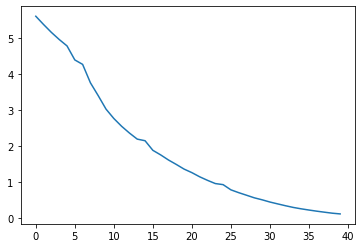

In [0]:
import time
import torch.nn as nn
import torch
from tfrecord.torch.dataset import TFRecordDataset
import numpy as np
import os

LEARNING_RATE = 0.001
EPOCH = 40
BATCH_SIZE = 2
MAX_GRAD_NORM = 1.0

print(f"--- Resume/Start training ---")   
feat_map = {"input_ids": "int", 
           "input_mask": "int",
           "segment_ids": "int",
           "next_sentence_labels": "int",
           "masked_lm_positions": "int",
           "masked_lm_ids": "int"}
pretrain_file = 'restaurant_review_train'

# Create albert pretrain model
config = AlbertConfig.from_json_file("albert_config.json")
albert_pretrain = AlbertForPretrain(config)
# Create optimizer
optimizer = Lamb([{"params": [p for n, p in list(albert_pretrain.named_parameters())]}], lr=LEARNING_RATE)
albert_pretrain.train()
dataset = TFRecordDataset(pretrain_file, index_path = None, description=feat_map)
loader = torch.utils.data.DataLoader(dataset, batch_size=BATCH_SIZE)

tmp_loss = 0
start_time = time.time()

if os.path.isfile('pretrain_checkpoint'):
    print(f"--- Load from checkpoint ---")
    checkpoint = torch.load("pretrain_checkpoint")
    albert_pretrain.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    loss = checkpoint['loss']
    losses = checkpoint['losses']
    
else:
    epoch = -1
    losses = []
for e in range(epoch+1, EPOCH):
    for batch in loader:
        b_input_ids = batch['input_ids'].long() 
        b_token_type_ids = batch['segment_ids'].long() 
        b_seq_relationship_labels = batch['next_sentence_labels'].long()

        # Convert the dataformat from loaded decoded format into format 
        # loaded format is created by google's Albert create_pretrain.py script
        # required by huggingfaces pytorch implementation of albert
        mask_rows = np.nonzero(batch['masked_lm_positions'].numpy())[0]
        mask_cols = batch['masked_lm_positions'].numpy()[batch['masked_lm_positions'].numpy()!=0]
        b_attention_mask = np.zeros((BATCH_SIZE,64),dtype=np.int64)
        b_attention_mask[mask_rows,mask_cols] = 1
        b_masked_lm_labels = np.zeros((BATCH_SIZE,64),dtype=np.int64) - 100
        b_masked_lm_labels[mask_rows,mask_cols] = batch['masked_lm_ids'].numpy()[batch['masked_lm_positions'].numpy()!=0]     
        b_attention_mask=torch.tensor(b_attention_mask).long()
        b_masked_lm_labels=torch.tensor(b_masked_lm_labels).long()


        loss = albert_pretrain(input_ids = b_input_ids
                              , attention_mask = b_attention_mask
                              , token_type_ids = b_token_type_ids
                              , masked_lm_labels = b_masked_lm_labels 
                              , seq_relationship_labels = b_seq_relationship_labels)

        # clears old gradients
        optimizer.zero_grad()
        # backward pass
        loss.backward()
        # gradient clipping
        torch.nn.utils.clip_grad_norm_(parameters=albert_pretrain.parameters(), max_norm=MAX_GRAD_NORM)
        # update parameters
        optimizer.step()

        tmp_loss += loss.detach().item()

    # print metrics and save to checkpoint every epoch
    print(f"Epoch: {e}")
    print(f"Train loss: {(tmp_loss/20)}")
    print(f"Train Time: {(time.time()-start_time)/60} mins")  
    losses.append(tmp_loss/20)

    tmp_loss = 0
    start_time = time.time()

    torch.save({'model_state_dict': albert_pretrain.state_dict(),'optimizer_state_dict': optimizer.state_dict(),
               'epoch': e, 'loss': loss,'losses': losses}
           , 'pretrain_checkpoint')
from matplotlib import pyplot as plot
plot.plot(losses)

Step 4 Albert Finetuning for token classification task

In [0]:
# At the time of writing, Hugging face didnt provide the class object for 
# AlbertForTokenClassification, hence write your own defination below
from transformers.modeling_albert import AlbertModel, AlbertPreTrainedModel
from transformers.configuration_albert import AlbertConfig
from transformers.tokenization_bert import BertTokenizer
import torch.nn as nn
from torch.nn import CrossEntropyLoss
class AlbertForTokenClassification(AlbertPreTrainedModel):

    def __init__(self, albert, config):
        super().__init__(config)
        self.num_labels = config.num_labels

        self.albert = albert
        self.dropout = nn.Dropout(config.hidden_dropout_prob)
        self.classifier = nn.Linear(config.hidden_size, config.num_labels)

    def forward(
        self,
        input_ids=None,
        attention_mask=None,
        token_type_ids=None,
        position_ids=None,
        head_mask=None,
        inputs_embeds=None,
        labels=None,
    ):

        outputs = self.albert(
            input_ids,
            attention_mask=attention_mask,
            token_type_ids=token_type_ids,
            position_ids=position_ids,
            head_mask=head_mask,
            inputs_embeds=inputs_embeds,
        )

        sequence_output = outputs[0]

        sequence_output = self.dropout(sequence_output)
        logits = self.classifier(sequence_output)

        return logits

In [0]:
import numpy as np
def label_sent(name_tokens, sent_tokens):
    label = []
    i = 0
    if len(name_tokens)>len(sent_tokens):
        label = np.zeros(len(sent_tokens))
    else:
        while i<len(sent_tokens):
            found_match = False
            if name_tokens[0] == sent_tokens[i]:       
                found_match = True
                for j in range(len(name_tokens)-1):
                    if ((i+j+1)>=len(sent_tokens)):
                        return label
                    if name_tokens[j+1] != sent_tokens[i+j+1]:
                        found_match = False
                if found_match:
                    label.extend(list(np.ones(len(name_tokens)).astype(int)))
                    i = i + len(name_tokens)
                else: 
                    label.extend([0])
                    i = i+ 1
            else:
                label.extend([0])
                i=i+1
    return label

import pandas as pd
import glob
import os

tokenizer = BertTokenizer(vocab_file="vocab.txt")

df_data_train = pd.read_csv("dish_name_train.csv")
df_data_train['name_tokens'] = df_data_train['dish_name'].apply(tokenizer.tokenize)
df_data_train['review_tokens'] = df_data_train.review.apply(tokenizer.tokenize)
df_data_train['review_label'] = df_data_train.apply(lambda row: label_sent(row['name_tokens'], row['review_tokens']), axis=1)

df_data_val = pd.read_csv("dish_name_val.csv")
df_data_val = df_data_val.dropna().reset_index()
df_data_val['name_tokens'] = df_data_val['dish_name'].apply(tokenizer.tokenize)
df_data_val['review_tokens'] = df_data_val.review.apply(tokenizer.tokenize)
df_data_val['review_label'] = df_data_val.apply(lambda row: label_sent(row['name_tokens'], row['review_tokens']), axis=1)

MAX_LEN = 64
BATCH_SIZE = 1
from keras.preprocessing.sequence import pad_sequences
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

tr_inputs = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in df_data_train['review_tokens']],maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
tr_tags = pad_sequences(df_data_train['review_label'],maxlen=MAX_LEN, padding="post",dtype="long", truncating="post")
# create the mask to ignore the padded elements in the sequences.
tr_masks = [[float(i>0) for i in ii] for ii in tr_inputs]
tr_inputs = torch.tensor(tr_inputs)
tr_tags = torch.tensor(tr_tags)
tr_masks = torch.tensor(tr_masks)
train_data = TensorDataset(tr_inputs, tr_masks, tr_tags)
train_sampler = RandomSampler(train_data)
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=BATCH_SIZE)


val_inputs = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in df_data_val['review_tokens']],maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
val_tags = pad_sequences(df_data_val['review_label'],maxlen=MAX_LEN, padding="post",dtype="long", truncating="post")
# create the mask to ignore the padded elements in the sequences.
val_masks = [[float(i>0) for i in ii] for ii in val_inputs]
val_inputs = torch.tensor(val_inputs)
val_tags = torch.tensor(val_tags)
val_masks = torch.tensor(val_masks)
val_data = TensorDataset(val_inputs, val_masks, val_tags)
val_sampler = RandomSampler(val_data)
val_dataloader = DataLoader(val_data, sampler=val_sampler, batch_size=BATCH_SIZE)

Using TensorFlow backend.


In [0]:
model_tokenclassification = AlbertForTokenClassification(albert_pretrain.albert, config)
from torch.optim import Adam
LEARNING_RATE = 0.0000003
FULL_FINETUNING = True
if FULL_FINETUNING:
    param_optimizer = list(model_tokenclassification.named_parameters())
    no_decay = ['bias', 'gamma', 'beta']
    optimizer_grouped_parameters = [
        {'params': [p for n, p in param_optimizer if not any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.01},
        {'params': [p for n, p in param_optimizer if any(nd in n for nd in no_decay)],
         'weight_decay_rate': 0.0}
    ]
else:
    param_optimizer = list(model_tokenclassification.classifier.named_parameters()) 
    optimizer_grouped_parameters = [{"params": [p for n, p in param_optimizer]}]
optimizer = Adam(optimizer_grouped_parameters, lr=LEARNING_RATE)

--- Load from checkpoint ---
--- Resume/Start training ---


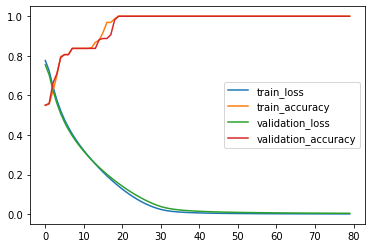

In [0]:
# from torch.utils.tensorboard import SummaryWriter
import time
import os.path
import torch.nn as nn
import torch
EPOCH = 800
MAX_GRAD_NORM = 1.0

start_time = time.time()
tr_loss, tr_acc, nb_tr_steps = 0, 0, 0
eval_loss, eval_acc, nb_eval_steps = 0, 0, 0

if os.path.isfile('finetune_checkpoint'):
    print(f"--- Load from checkpoint ---")
    checkpoint = torch.load("finetune_checkpoint")
    model_tokenclassification.load_state_dict(checkpoint['model_state_dict'])
    optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
    epoch = checkpoint['epoch']
    train_losses = checkpoint['train_losses']
    train_accs = checkpoint['train_accs']
    eval_losses = checkpoint['eval_losses']
    eval_accs = checkpoint['eval_accs']
    
else:
    epoch = -1
    train_losses,train_accs,eval_losses,eval_accs = [],[],[],[]

print(f"--- Resume/Start training ---")    
for e in range(epoch+1, EPOCH): 
    
    # TRAIN loop
    model_tokenclassification.train()
    
    for batch in train_dataloader:
        # add batch to gpu
        batch = tuple(t for t in batch)
        b_input_ids, b_input_mask, b_labels = batch
        # forward pass
        b_outputs = model_tokenclassification(b_input_ids, token_type_ids=None, attention_mask=b_input_mask, labels=b_labels)
        
        ce_loss_fct = CrossEntropyLoss()
        # Only keep active parts of the loss
        b_active_loss = b_input_mask.view(-1) == 1
        b_active_logits = b_outputs.view(-1, config.num_labels)[b_active_loss]
        b_active_labels = b_labels.view(-1)[b_active_loss]
        
        loss = ce_loss_fct(b_active_logits, b_active_labels)
        acc = torch.mean((torch.max(b_active_logits.detach(),1)[1] == b_active_labels.detach()).float())

        model_tokenclassification.zero_grad()
        # backward pass
        loss.backward()
        # track train loss
        tr_loss += loss.item()
        tr_acc += acc
        nb_tr_steps += 1
        # gradient clipping
        torch.nn.utils.clip_grad_norm_(parameters=model_tokenclassification.parameters(), max_norm=MAX_GRAD_NORM)
        # update parameters
        optimizer.step()
        

    # VALIDATION on validation set
    model_tokenclassification.eval()
    for batch in val_dataloader:
        batch = tuple(t for t in batch)
        b_input_ids, b_input_mask, b_labels = batch

        with torch.no_grad():
            
            b_outputs = model_tokenclassification(b_input_ids, token_type_ids=None,
                         attention_mask=b_input_mask, labels=b_labels)

            loss_fct = CrossEntropyLoss()
            # Only keep active parts of the loss
            b_active_loss = b_input_mask.view(-1) == 1
            b_active_logits = b_outputs.view(-1, config.num_labels)[b_active_loss]
            b_active_labels = b_labels.view(-1)[b_active_loss]
            loss = loss_fct(b_active_logits, b_active_labels)
            acc = np.mean(np.argmax(b_active_logits.detach().cpu().numpy(), axis=1).flatten() == b_active_labels.detach().cpu().numpy().flatten())

        eval_loss += loss.mean().item()
        eval_acc += acc
        nb_eval_steps += 1    
    
    if e % 10 ==0:
        
        print(f"Epoch: {e}")
        print(f"Train loss: {(tr_loss/nb_tr_steps)}")
        print(f"Train acc: {(tr_acc/nb_tr_steps)}")
        print(f"Train Time: {(time.time()-start_time)/60} mins")  
        
        print(f"Validation loss: {eval_loss/nb_eval_steps}")
        print(f"Validation Accuracy: {(eval_acc/nb_eval_steps)}") 
        
        train_losses.append(tr_loss/nb_tr_steps)
        train_accs.append(tr_acc/nb_tr_steps)
        eval_losses.append(eval_loss/nb_eval_steps)
        eval_accs.append(eval_acc/nb_eval_steps)
        
        
        tr_loss, tr_acc, nb_tr_steps = 0, 0, 0 
        eval_loss, eval_acc, nb_eval_steps = 0, 0, 0 
        start_time = time.time() 
        
        torch.save({'model_state_dict': model_tokenclassification.state_dict(),'optimizer_state_dict': optimizer.state_dict(),
           'epoch': e, 'train_losses': train_losses,'train_accs': train_accs, 'eval_losses':eval_losses,'eval_accs':eval_accs}
       , 'finetune_checkpoint')

plot.plot(train_losses)
plot.plot(train_accs)
plot.plot(eval_losses)
plot.plot(eval_accs)
plot.legend(labels = ['train_loss','train_accuracy','validation_loss','validation_accuracy'])

In [0]:
def predict(texts):
    tokenized_texts = [tokenizer.tokenize(txt) for txt in texts]
    input_ids = pad_sequences([tokenizer.convert_tokens_to_ids(txt) for txt in tokenized_texts],
                              maxlen=MAX_LEN, dtype="long", truncating="post", padding="post")
    attention_mask = [[float(i>0) for i in ii] for ii in input_ids]
    
    input_ids = torch.tensor(input_ids)
    attention_mask = torch.tensor(attention_mask)

    dataset = TensorDataset(input_ids, attention_mask)
    datasampler = SequentialSampler(dataset)
    dataloader = DataLoader(dataset, sampler=datasampler, batch_size=BATCH_SIZE) 
    
    predicted_labels = []
    
    for batch in dataloader:
        batch = tuple(t for t in batch)
        b_input_ids, b_input_mask = batch
        
        with torch.no_grad():
            logits = model_tokenclassification(b_input_ids, token_type_ids=None,
                           attention_mask=b_input_mask)

            predicted_labels.append(np.multiply(np.argmax(logits.detach().cpu().numpy(),axis=2), b_input_mask.detach().cpu().numpy()))
    # np.concatenate(predicted_labels), to flatten list of arrays of batch_size * max_len into list of arrays of max_len
    return np.concatenate(predicted_labels).astype(int), tokenized_texts

def get_dish_candidate_names(predicted_label, tokenized_text):
    name_lists = []
    if len(np.where(predicted_label>0)[0])>0:
        name_idx_combined = np.where(predicted_label>0)[0]
        name_idxs = np.split(name_idx_combined, np.where(np.diff(name_idx_combined) != 1)[0]+1)
        name_lists.append([" ".join(np.take(tokenized_text,name_idx)) for name_idx in name_idxs])
        # If there duplicate names in the name_lists
        name_lists = np.unique(name_lists)
        return name_lists
    else:
        return None
    
texts = df_data_val.review.values
predicted_labels, _ = predict(texts)
df_data_val['predicted_review_label'] = list(predicted_labels)
df_data_val['predicted_name']=df_data_val.apply(lambda row: get_dish_candidate_names(row.predicted_review_label, row.review_tokens)
                                                , axis=1)

texts = df_data_train.review.values
predicted_labels, _ = predict(texts)
df_data_train['predicted_review_label'] = list(predicted_labels)
df_data_train['predicted_name']=df_data_train.apply(lambda row: get_dish_candidate_names(row.predicted_review_label, row.review_tokens)
                                                , axis=1)

In [0]:
df_data_val

,index,review,dish_name,name_tokens,review_tokens,review_label,predicted_review_label,predicted_name
0,0,I like the chicken rice a lot!,chicken rice,"[chicken, rice]","[i, like, the, chicken, rice, a, l, ##o, ##t, !]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[chicken rice]
1,1,The mala steamboat doesn't taste nice.,mala steamboat,"[mala, steamboat]","[the, mala, steamboat, d, ##o, ##e, ##s, ##n, ...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[mala steamboat]


In [0]:
df_data_train

,review,dish_name,name_tokens,review_tokens,review_label,predicted_review_label,predicted_name
0,I like the mala steamboat a lot!,mala steamboat,"[mala, steamboat]","[i, like, the, mala, steamboat, a, l, ##o, ##t...","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0]","[0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[mala steamboat]
1,The chicken rice doesn't taste nice.,chicken rice,"[chicken, rice]","[the, chicken, rice, d, ##o, ##e, ##s, ##n, ',...","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]","[0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",[chicken rice]
